In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from constants import random_seed

%matplotlib inline

In [2]:
torch.manual_seed(random_seed)

# Read the features

In [3]:
# Read the dataset from csv file
df = pd.read_csv('../dataset/well_data.csv', index_col=0)

# Test set (this is the period for which we must estimate QTOT)
test_set = df.iloc[2000:2500]

# Make a copy of the dataset and remove the test dataset
train_val_set = df.copy().drop(test_set.index)

# Sample validation dataset without replacement (10%)
val_set = train_val_set.sample(frac=0.1, replace=False, random_state=random_seed)

# The remaining dataset is used for training (90%)
train_set = train_val_set.copy().drop(val_set.index)

# Check that the numbers add up
n_points = len(train_set) + len(val_set) + len(test_set)
assert(n_points == len(df))

# Plot the features

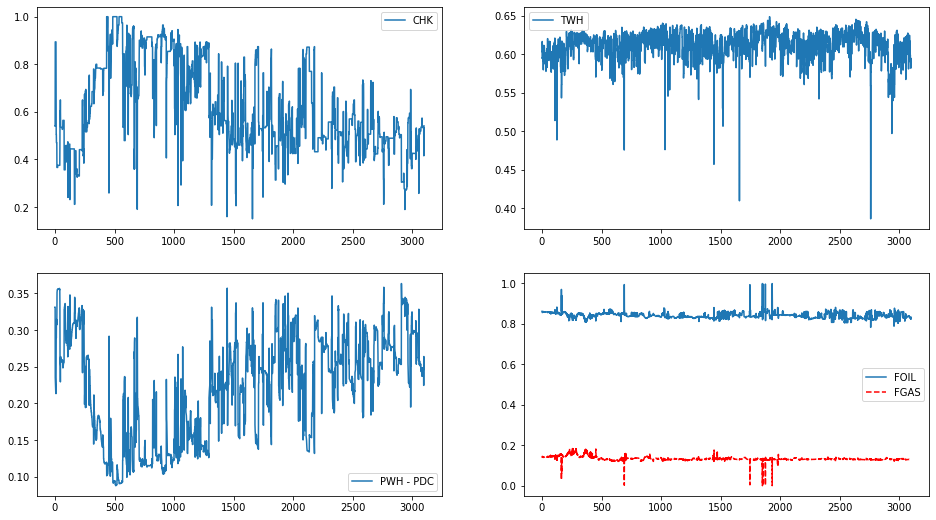

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))

# Choke valve opening
ax[0, 0].plot(df['CHK'], label='CHK')
ax[0, 0].legend()

# Total flow through choke valve
ax[0, 1].plot(df['TWH'], label='TWH')
ax[0, 1].legend()

# Diff pressure over choke valve
ax[1, 0].plot(df['PWH'] - df['PDC'], label='PWH - PDC')
ax[1, 0].legend()

# Fractions
ax[1, 1].plot(df['FOIL'], label='FOIL')
ax[1, 1].plot(df['FGAS'], '--r', label='FGAS')
ax[1, 1].legend()


# Plot the train, validation and test set

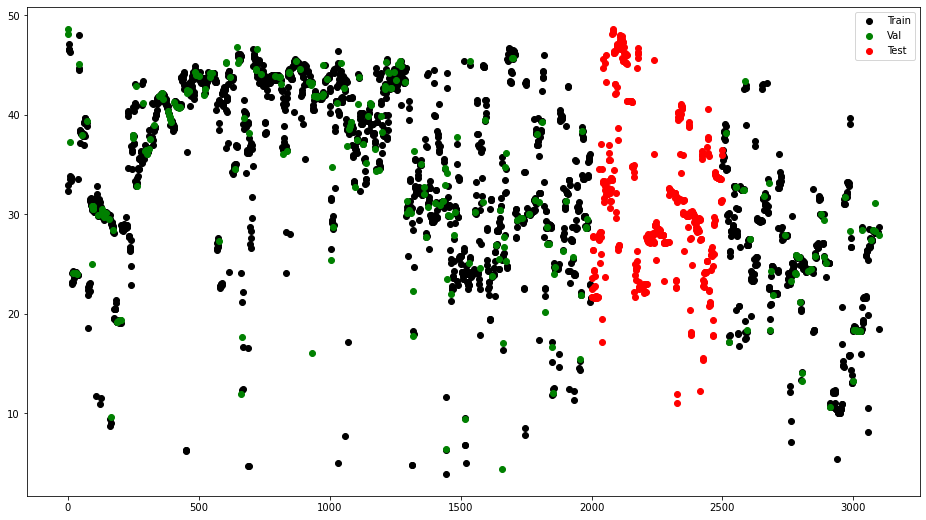

In [5]:
plt.figure(figsize=(16, 9))
plt.scatter(train_set.index, train_set['QTOT'], color='black', label='Train')
plt.scatter(val_set.index, val_set['QTOT'], color='green', label='Val')
plt.scatter(test_set.index, test_set['QTOT'], color='red', label='Test')
plt.legend()